In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from arch import arch_model
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [8]:
DATA = yf.download('BTC-USD ETH-USD USDT-USD ^IXIC GBP=X EUR=X JPY=X', start='2017-01-01', end='2022-12-31')


[*********************100%***********************]  7 of 7 completed


In [4]:
DATA.describe()

Adj Close                                                      \
            BTC-USD      ETH-USD        EUR=X        GBP=X        JPY=X   
count   2190.000000  1878.000000  1562.000000  1562.000000  1562.000000   
mean   17618.293882  1129.866214     0.883551     0.771339   113.270928   
std    16743.597518  1188.248177     0.047421     0.039212     9.559813   
min      777.757019    84.308296     0.799360     0.697250   102.678001   
25%     6417.151245   211.273056     0.847800     0.743993   108.361500   
50%     9665.131836   502.186005     0.880615     0.767675   110.394001   
75%    23716.013672  1776.031830     0.907700     0.795390   113.408752   
max    67566.828125  4812.087402     1.042080     0.932180   150.175995   

                                         Close                            ...  \
          USDT-USD         ^IXIC       BTC-USD      ETH-USD        EUR=X  ...   
count  1878.000000   1510.000000   2190.000000  1878.000000  1562.000000  ...   
mean      1.001576   9736.818923  17618.293882  1129.866214     0.883551  ...   
std       0.005711   2999.062154  16743.597518  1188.248177     0.047421  ...   
min       0.966644   5429.080078    777.757019    84.308296     0.799360  ...   
25%       0.999980   7300.184814   6417.151245   211.273056     0.847800  ...   
50%       1.000474   8520.259766   9665.131836   502.186005     0.880615  ...   
75%       1.002481  12337.872559  23716.013672  1776.031830     0.907700  ...   
max       1.077880  16057.440430  67566.828125  4812.087402     1.042080  ...   

              Open                                   Volume                \
             JPY=X     USDT-USD         ^IXIC       BTC-USD       ETH-USD   
count  1562.000000  1878.000000   1510.000000  2.190000e+03  1.878000e+03   
mean    113.271603     1.001574   9737.046250  2.257148e+10  1.290502e+10   
std       9.558658     0.005760   3001.847406  2.028514e+10  1.078973e+10   
min     102.699997     0.972522   5425.620117  6.085170e+07  6.217330e+08   
25%     108.367498     0.999975   7297.034912  5.303117e+09  4.482132e+09   
50%     110.393497     1.000499   8475.090332  1.975268e+10  1.063680e+10   
75%     113.404499     1.002505  12287.189941  3.318129e+10  1.819766e+10   
max     150.175995     1.080950  16120.919922  3.509679e+11  8.448291e+10   

                                                           
        EUR=X   GBP=X   JPY=X      USDT-USD         ^IXIC  
count  1562.0  1562.0  1562.0  1.878000e+03  1.510000e+03  
mean      0.0     0.0     0.0  4.114296e+10  3.404665e+09  
std       0.0     0.0     0.0  3.804720e+10  1.560906e+09  
min       0.0     0.0     0.0  3.581880e+08  8.721100e+08  
25%       0.0     0.0     0.0  6.940532e+09  2.063400e+09  
50%       0.0     0.0     0.0  3.513653e+10  2.770050e+09  
75%       0.0     0.0     0.0  6.046316e+10  4.536770e+09  
max       0.0     0.0     0.0  2.790675e+11  1.162119e+10  

[8 rows x 42 columns]

In [9]:
# Closing daily Price of  data
DATA = DATA['Adj Close'] 
print (DATA)

                 BTC-USD      ETH-USD    EUR=X     GBP=X       JPY=X  \
Date                                                                   
2017-01-01    998.325012          NaN      NaN       NaN         NaN   
2017-01-02   1021.750000          NaN  0.94994  0.809780  116.794998   
2017-01-03   1043.839966          NaN  0.95602  0.814200  117.495003   
2017-01-04   1154.729980          NaN  0.95970  0.816620  117.658997   
2017-01-05   1013.380005          NaN  0.95230  0.811240  117.112999   
...                  ...          ...      ...       ...         ...   
2022-12-26  16919.804688  1226.974365  0.93740  0.829187  132.789993   
2022-12-27  16717.173828  1212.791626  0.93983  0.827530  132.764008   
2022-12-28  16552.572266  1189.986084  0.94010  0.831440  133.485992   
2022-12-29  16642.341797  1201.595337  0.94080  0.831360  134.033997   
2022-12-30  16602.585938  1199.232788  0.93802  0.829440  132.916000   

            USDT-USD         ^IXIC  
Date                      

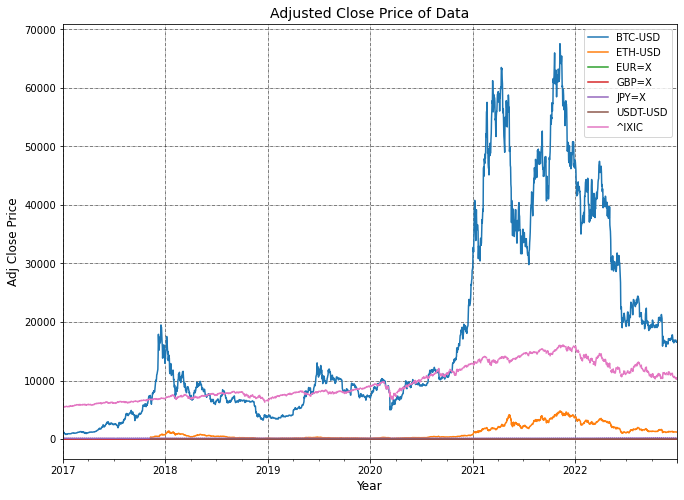

In [6]:
 # Plot the adjusted close price
DATA.plot(figsize=(11, 8))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of Data" % DATA, fontsize=14)
# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [72]:
# It looks like the data may contain non-numeric values, so we need to handle those
# One way to do this is to convert all columns to a numeric data type using the pd.to_numeric() function
# This function will convert any non-numeric values to NaN (Not a Number)
DATA = DATA.apply(pd.to_numeric, errors='coerce')

In [10]:
DATA_log_returns = np.log(DATA / DATA.shift(1)).dropna()
DATA_log_returns.head()

,BTC-USD,ETH-USD,EUR=X,GBP=X,JPY=X,USDT-USD,^IXIC
Date,,,,,,,
2017-11-10,-0.076400,-0.069790,-0.004300,-0.002389,-0.004857,-0.002155,0.000132
2017-11-14,0.011559,0.063948,-0.000327,-0.000236,-0.000889,-0.002500,-0.002924
2017-11-15,0.097529,-0.012740,-0.010908,-0.002628,-0.001612,-0.003632,-0.004710
2017-11-21,-0.015903,-0.017409,-0.000798,-0.003200,0.004568,-0.005879,0.010513
2017-11-22,0.022334,0.054668,0.000340,-0.000040,-0.001868,0.004111,0.000711


In [8]:
DATA_log_returns.describe()

,BTC-USD,ETH-USD,EUR=X,GBP=X,JPY=X,USDT-USD,^IXIC
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,0.000382,-0.000242,0.000061,-0.000031,0.000233,0.000060,0.000477
std,0.043256,0.054675,0.004563,0.005917,0.004954,0.005070,0.015600
min,-0.464730,-0.550732,-0.017088,-0.030308,-0.037961,-0.052570,-0.099099
25%,-0.016847,-0.023749,-0.002705,-0.003133,-0.002199,-0.000722,-0.006126
50%,0.000806,-0.000260,-0.000023,0.000053,0.000322,-0.000003,0.001001
75%,0.019392,0.028840,0.002666,0.003187,0.003018,0.000848,0.008306
max,0.225119,0.234741,0.028144,0.041806,0.026689,0.056606,0.089347


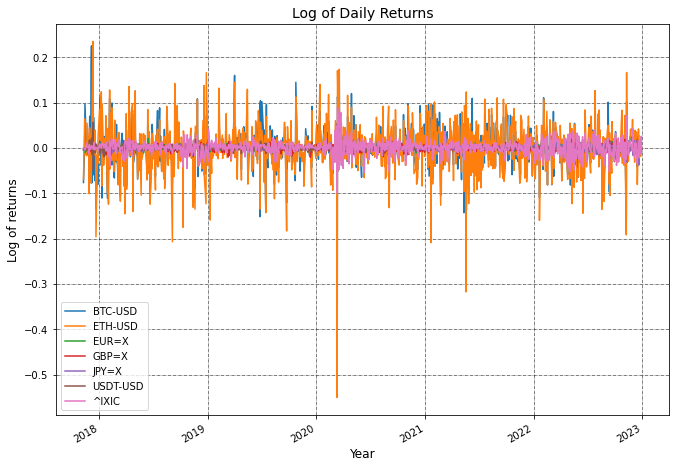

In [9]:
 # Plot the adjusted close price
DATA_log_returns.plot(figsize=(11, 8))
# Define the label for the title of the figure
plt.title("Log of Daily Returns" % DATA, fontsize=14)
# Define the labels for x-axis and y-axis
plt.ylabel('Log of returns', fontsize=12)
plt.xlabel('Year', fontsize=12)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [72]:
from scipy.stats import skew, kurtosis
print("Skewness: ", skew(DATA_log_returns))
print("Kurtosis: ", kurtosis(DATA_log_returns))

Skewness:  [-1.09913817 -1.33107652  0.24667042  0.00712084 -0.51693368  0.68775052
 -0.21891226]
Kurtosis:  [14.98524331 12.17719436  2.23363099  4.59501082  6.83616761 48.91257171
  4.40398149]


In [10]:
Return_Correlation = DATA_log_returns.corr() #calculated to understand portfolio diversification
print(Return_Correlation)

           BTC-USD   ETH-USD     EUR=X     GBP=X     JPY=X  USDT-USD     ^IXIC
BTC-USD   1.000000  0.812844  0.043795  0.109455  0.027134  0.013104  0.341121
ETH-USD   0.812844  1.000000  0.027284  0.093116  0.027928 -0.023542  0.349241
EUR=X     0.043795  0.027284  1.000000  0.642300  0.382514  0.028321 -0.000854
GBP=X     0.109455  0.093116  0.642300  1.000000  0.303357  0.015991  0.055509
JPY=X     0.027134  0.027928  0.382514  0.303357  1.000000  0.006405 -0.006210
USDT-USD  0.013104 -0.023542  0.028321  0.015991  0.006405  1.000000 -0.120801
^IXIC     0.341121  0.349241 -0.000854  0.055509 -0.006210 -0.120801  1.000000


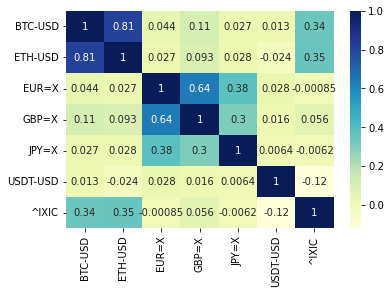

In [11]:
import seaborn as sns
#plotting correlation heatmap
dataplot= sns.heatmap(Return_Correlation,cmap='YlGnBu',annot=True)

In [78]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=ADF(DATA_log_returns['BTC-USD'], lags=10)
print(USDT_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.746
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [88]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=PhillipsPerron(DATA_log_returns['BTC-USD'], lags=10)
print(USDT_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.424
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [79]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=ADF(DATA_log_returns['ETH-USD'], lags=10)
print(USDT_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.438
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [87]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=PhillipsPerron(DATA_log_returns['ETH-USD'], lags=10)
print(USDT_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.059
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [13]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=ADF(DATA_log_returns['USDT-USD'], lags=10)
print(USDT_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -11.829
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [86]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=PhillipsPerron(DATA_log_returns['USDT-USD'], lags=10)
print(USDT_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -53.665
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
EURO_test=ADF(DATA_log_returns['EUR=X'], lags=10)
print(EURO_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.939
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [85]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
EURO_test=PhillipsPerron(DATA_log_returns['EUR=X'], lags=10)
print(EURO_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.968
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
JPY_test=ADF(DATA_log_returns['JPY=X'], lags=10)
print(JPY_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.431
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [83]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
JPY_test=PhillipsPerron(DATA_log_returns['JPY=X'], lags=10)
print(JPY_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.468
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [17]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
GBP_test=ADF(DATA_log_returns['GBP=X'], lags=10)
print(GBP_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.332
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [82]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
GBP_test=PhillipsPerron(DATA_log_returns['GBP=X'], lags=10)
print(GBP_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.091
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [80]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=ADF(DATA_log_returns['^IXIC'], lags=10)
print(USDT_test.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.967
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [81]:
# Testing for the presence of unit root using ADF test of BTC Return
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

# test levels
USDT_test=PhillipsPerron(DATA_log_returns['^IXIC'], lags=10)
print(USDT_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -35.950
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [75]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['BTC-USD'], DATA_log_returns['^IXIC'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.341
P-value: 0.000


In [76]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_euro_corr,btc_euro_pvalue = pearsonr(DATA_log_returns['BTC-USD'], DATA_log_returns['EUR=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_euro_corr:.3f}')
print(f'P-value: {btc_euro_pvalue:.3f}')

Correlation coefficient: 0.044
P-value: 0.165


In [73]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_gbp_corr,btc_gbp_pvalue = pearsonr(DATA_log_returns['BTC-USD'], DATA_log_returns['GBP=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_gbp_corr:.3f}')
print(f'P-value: {btc_gbp_pvalue:.3f}')

Correlation coefficient: 0.109
P-value: 0.000


In [74]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_jpy_corr,btc_jpy_pvalue = pearsonr(DATA_log_returns['BTC-USD'], DATA_log_returns['JPY=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_jpy_corr:.3f}')
print(f'P-value: {btc_jpy_pvalue:.3f}')

Correlation coefficient: 0.027
P-value: 0.389


In [23]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['ETH-USD'], DATA_log_returns['^IXIC'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.349
P-value: 0.000


In [24]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['ETH-USD'], DATA_log_returns['EUR=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.027
P-value: 0.387


In [25]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['ETH-USD'], DATA_log_returns['GBP=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.093
P-value: 0.003


In [26]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['ETH-USD'], DATA_log_returns['JPY=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.028
P-value: 0.376


In [77]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
usdt_nasdaq_corr,usdt_nasdaq_pvalue = pearsonr(DATA_log_returns['USDT-USD'], DATA_log_returns['^IXIC'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {usdt_nasdaq_corr:.3f}')
print(f'P-value: {usdt_nasdaq_pvalue:.3f}')

Correlation coefficient: -0.121
P-value: 0.000


In [28]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['USDT-USD'], DATA_log_returns['EUR=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.028
P-value: 0.369


In [29]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['USDT-USD'], DATA_log_returns['GBP=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.016
P-value: 0.612


In [30]:
from scipy.stats import pearsonr, kendalltau

# Calculate the correlation coefficient and p-value
btc_nasdaq_corr,btc_nasdaq_pvalue = pearsonr(DATA_log_returns['USDT-USD'], DATA_log_returns['JPY=X'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {btc_nasdaq_corr:.3f}')
print(f'P-value: {btc_nasdaq_pvalue:.3f}')

Correlation coefficient: 0.006
P-value: 0.839


###### AR(1) model including all exogeneous model with Bitcoin Dependent

In [12]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X = DATA_log_returns[["GBP=X","BTC-USD", "USDT-USD", "EUR=X", "JPY=X","^IXIC"]]
y = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model = AutoReg(y, exog=X, lags=1)
results = model.fit()

# Print the model summary
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                ETH-USD   No. Observations:                 1008
Model:                   AutoReg-X(1)   Log Likelihood                2052.095
Method:               Conditional MLE   S.D. of innovations              0.032
Date:                Mon, 23 Jan 2023   AIC                          -4086.190
Time:                        16:32:07   BIC                          -4041.957
Sample:                             1   HQIC                         -4069.384
                                 1008                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.757      0.449      -0.003       0.001
ETH-USD.L1    -0.0030      0.019     -0.161      0.872      -0.039       0.033
GBP=X          0.1000      0.223      0.449      0.6

In [13]:
from arch import arch_model

# Estimate the AR(1)-GARCH(1,1) model
am = arch_model(results.resid, mean='AR', vol='GARCH', p=1, o=0, q=1, dist='Normal')
res = am.fit()
#The above code will estimate an ARCH(1) model for the residuals of the AR(1) model, where the mean equation is specified as
#"AR" and the volatility equation is specified as "GARCH". The parameters p,o,q represents the order of the AR, order of the
#exogenous variables and order of the GARCH respectively. dist parameter is set to 'Normal' which is the standard assumption 
#for the distribution of the residuals.

# Print the model summary
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2305466400.795961
Iteration:      2,   Func. Count:     17,   Neg. LLF: 571370852.3346435
Iteration:      3,   Func. Count:     28,   Neg. LLF: 724851.866668257
Iteration:      4,   Func. Count:     40,   Neg. LLF: 9927117.520431824
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1373385.4636925387
Iteration:      6,   Func. Count:     62,   Neg. LLF: 4680309.30994105
Iteration:      7,   Func. Count:     72,   Neg. LLF: 2009721815.3289514
Iteration:      8,   Func. Count:     83,   Neg. LLF: 3388503926.89187
Iteration:      9,   Func. Count:     94,   Neg. LLF: 767449.3052895027
Iteration:     10,   Func. Count:    105,   Neg. LLF: 1899483688.6939814
Iteration:     11,   Func. Count:    117,   Neg. LLF: 1404405661239628.8
Iteration:     12,   Func. Count:    128,   Neg. LLF: -2191.2257895368284
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2191.2257897960158
            Iterations:

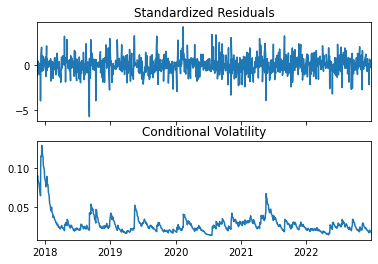

In [14]:
# Plot the residuals
import matplotlib.pyplot as plt
res.plot()
plt.show()

In [15]:
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# Estimate the AR(1) model with exogenous variables
model = AutoReg(y, exog=X, lags=1)
results = model.fit()

# Perform the LM test for ARCH effects
am = arch_model(results.resid, mean='AR', vol='Constant', dist='Normal')
res = am.fit()
print(res.arch_lm_test())

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 207.4019
P-value: 0.0000
Distributed: chi2(22)


In [16]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X1 = DATA_log_returns["BTC-USD"]
y1 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model1 = AutoReg(y1, exog=X1, lags=1)
results1 = model1.fit()

# Print the model summary
print(results1.summary())


                            AutoReg Model Results                             
Dep. Variable:                ETH-USD   No. Observations:                 1008
Model:                   AutoReg-X(1)   Log Likelihood                2042.173
Method:               Conditional MLE   S.D. of innovations              0.032
Date:                Mon, 23 Jan 2023   AIC                          -4076.345
Time:                        16:32:58   BIC                          -4056.686
Sample:                             1   HQIC                         -4068.876
                                 1008                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.643      0.520      -0.003       0.001
ETH-USD.L1    -0.0067      0.018     -0.363      0.717      -0.043       0.029
BTC-USD        1.0271      0.023     44.069      0.0

In [17]:
# Obtain the residuals from the AR(1) model
residuals1 = results1.resid
am1 = arch_model(residuals1, p=1,o=0, q=1,)
res_garch1 = am1.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2164264660.775427
Iteration:      2,   Func. Count:     17,   Neg. LLF: 416149663.1644084
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3743825.3796097753
Iteration:      4,   Func. Count:     40,   Neg. LLF: 330219.3791516751
Iteration:      5,   Func. Count:     49,   Neg. LLF: 22136962571.872105
Iteration:      6,   Func. Count:     61,   Neg. LLF: 651235.1227632546
Iteration:      7,   Func. Count:     71,   Neg. LLF: 9514825123.42336
Iteration:      8,   Func. Count:     82,   Neg. LLF: 767438231367.3478
Iteration:      9,   Func. Count:     92,   Neg. LLF: 4017.287887312905
Iteration:     10,   Func. Count:    102,   Neg. LLF: 262.77310722847915
Iteration:     11,   Func. Count:    111,   Neg. LLF: 1483452.353890385
Iteration:     12,   Func. Count:    120,   Neg. LLF: -1972.5869081768974
Iteration:     13,   Func. Count:    128,   Neg. LLF: -2125.880030761798
Iteration:     14,   Func. Count:    134,   Neg. LLF: -1693

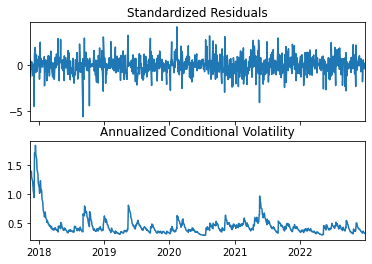

In [18]:
fig2 = res_garch1.plot(annualize="D") #generating volatility graphs

In [19]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X2 = DATA_log_returns [ "USDT-USD"]
y2 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model2 = AutoReg(y2, exog=X2, lags=1)
results2 = model2.fit()



In [20]:
# Perform the LM test for ARCH effects
am2 = arch_model(results2.resid, mean='AR', vol='Constant', dist='Normal')
res2 = am2.fit()
print(res2.arch_lm_test())


ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 11.0812
P-value: 0.9736
Distributed: chi2(22)


In [21]:
# Obtain the residuals from the AR(1) model
residuals2 = results2.resid

am = arch_model(residuals2, p=1,o=0, q=1,)
res_garch2 = am.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch2.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 703573.5415955741
Iteration:      2,   Func. Count:     17,   Neg. LLF: 545.3556715045524
Iteration:      3,   Func. Count:     26,   Neg. LLF: -55.08210949909482
Iteration:      4,   Func. Count:     34,   Neg. LLF: 123798921.92806633
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1505.3515414477806
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1505.3515427665702
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1505.35
Distribution:                  Normal   AIC:                          -3002.70
Method:            Maximum Likel

In [66]:
from statsmodels.tsa.adfvalues import mackinnonp
# Step 2: Testing unit roots in residuals. Please note the critical values reported
# with the test are not suitable for cointegration test.

coint = sm.tsa.stattools.adfuller(residuals2, maxlag=10, autolag='aic',regression='c', regresults=True) 

test=coint[0]

# Get approx p-value from a precomputed table (from stattools)
pvalue = mackinnonp(test, 'c', N=3) # N=3 refers to the number of variables in the model
pvalue


0.0

In [22]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X3 = DATA_log_returns["EUR=X"]
y3 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model3 = AutoReg(y3, exog=X3, lags=1)
results3 = model3.fit()

# Obtain the residuals from the AR(1) model
residuals3 = results3.resid

am = arch_model(residuals3, p=1,o=0, q=1,)
res_garch3 = am.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch3.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2708998.7670947267
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2135.835432130705
Iteration:      3,   Func. Count:     26,   Neg. LLF: 63457.56875855998
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1475.3035776776806
Iteration:      5,   Func. Count:     39,   Neg. LLF: -1371.4523201123598
Iteration:      6,   Func. Count:     45,   Neg. LLF: -1504.8294092175458
Iteration:      7,   Func. Count:     51,   Neg. LLF: -1505.7395251299508
Iteration:      8,   Func. Count:     56,   Neg. LLF: -1505.7449592537812
Iteration:      9,   Func. Count:     61,   Neg. LLF: -1505.7465545840478
Iteration:     10,   Func. Count:     66,   Neg. LLF: -1505.7466996602702
Iteration:     11,   Func. Count:     71,   Neg. LLF: -1505.7467030561306
Iteration:     12,   Func. Count:     75,   Neg. LLF: -1505.746703055986
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1505.7467030561306
        

In [23]:
# Perform the LM test for ARCH effects
am3 = arch_model(results3.resid, mean='AR', vol='Constant', dist='Normal')
res3 = am3.fit()
print(res3.arch_lm_test())

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 9.6650
P-value: 0.9891
Distributed: chi2(22)


In [24]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X4 = DATA_log_returns[ "^IXIC"]
y4 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model4 = AutoReg(y4, exog=X4, lags=1)
results4 = model4.fit()

# Obtain the residuals from the AR(1) model
residuals4 = results4.resid

am = arch_model(residuals4, p=1,o=0, q=1,)
res_garch4 = am.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch4.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11188010.032083303
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1255.713661817729
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2338.6748251718086
Iteration:      4,   Func. Count:     33,   Neg. LLF: -580.2866004584897
Iteration:      5,   Func. Count:     39,   Neg. LLF: -1570.648318448003
Iteration:      6,   Func. Count:     45,   Neg. LLF: -1548.8712866566214
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1534.288513698522
Iteration:      8,   Func. Count:     58,   Neg. LLF: -1551.4678159696928
Iteration:      9,   Func. Count:     65,   Neg. LLF: -1547.6702131213674
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1579.899873589743
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1579.903107657128
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1579.9031539780326
Iteration:     13,   Func. Count:     86,   Neg. LLF: -1579.9031554593234
Iteration:     14,   Func. Count:     90,   Ne

In [99]:
# Perform the LM test for ARCH effects
am4 = arch_model(results4.resid, mean='AR', vol='Constant', dist='Normal')
res4 = am4.fit()
print(res4.arch_lm_test())

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 26.2566
P-value: 0.2408
Distributed: chi2(22)


In [25]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X5 = DATA_log_returns["GBP=X"]
y5 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model5 = AutoReg(y5, exog=X5, lags=1)
results5 = model5.fit()

# Obtain the residuals from the AR(1) model
residuals5 = results5.resid

am = arch_model(residuals5, p=1,o=0, q=1,)
res_garch5 = am.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch5.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1882593.9754313352
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2132.599597713157
Iteration:      3,   Func. Count:     26,   Neg. LLF: 9757.35495617399
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1504.4475739773582
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1507.6238578108337
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1507.953150842131
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1507.9531546213213
Iteration:      8,   Func. Count:     53,   Neg. LLF: -1507.9531546211151
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1507.9531546213213
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-s

In [101]:
# Perform the LM test for ARCH effects
am5 = arch_model(results5.resid, mean='AR', vol='Constant', dist='Normal')
res5 = am5.fit()
print(res5.arch_lm_test())

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 7.6818
P-value: 0.9979
Distributed: chi2(22)


In [26]:
from statsmodels.tsa.ar_model import AutoReg

# Define the independent and dependent variables
X6 = DATA_log_returns["JPY=X"]
y6 = DATA_log_returns["ETH-USD"]

# Estimate the AR(1) model with exogenous variables
model6 = AutoReg(y6, exog=X6, lags=1)
results6 = model6.fit()

# Obtain the residuals from the AR(1) model
residuals6 = results6.resid

am6 = arch_model(residuals6, p=1,o=0, q=1,)
res_garch6 = am6.fit()

# Print the summary of the GARCH component of the GARCH(1,1) model
print(res_garch6.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2598207.059353853
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2135.7509349713628
Iteration:      3,   Func. Count:     26,   Neg. LLF: 85020.82626238646
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1476.699466537314
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1417.4341844638616
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1503.5679046838452
Iteration:      7,   Func. Count:     50,   Neg. LLF: -1506.143327719745
Iteration:      8,   Func. Count:     55,   Neg. LLF: -1506.1492373155602
Iteration:      9,   Func. Count:     60,   Neg. LLF: -1506.1492637440836
Iteration:     10,   Func. Count:     64,   Neg. LLF: -1506.1492637438391
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1506.1492637440836
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results

In [ ]:
# Perform the LM test for ARCH effects
am5 = arch_model(res.resid, mean='AR', vol='Constant', dist='Normal')
res5 = am5.fit()
print(res5.arch_lm_test())